In [1]:
# get the environment
import sys
print(sys.version)
print(sys.executable)
import os
os.getcwd()

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\python.exe


'C:\\Users\\bbutler\\Documents\\DataScience\\NLP'

In [2]:
# Standard imports
import sys
import warnings
warnings.simplefilter('ignore')
import os
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# text libraries

import nltk
from wordcloud import WordCloud, STOPWORDS

In [5]:
# get the data

data = pd.read_csv('Transaction_Survey.csv', low_memory=False)
data.head()

Respondent Id          Completed Date        CIS  Event_Trigger  \
0        5838490  01/08/2021 12:44:28 PM  2160715.0  accountsEvent   
1        5838485  01/08/2021 12:25:57 PM   696492.0  accountsEvent   
2        5838482  01/08/2021 12:14:21 PM  2069130.0  accountsEvent   
3        5838481  01/08/2021 12:14:17 PM    98647.0  accountsEvent   
4        5838480  01/08/2021 12:13:56 PM   342217.0   depositEvent   

  What best describes your experience?* Please say more.         OS DeviceType  
0                         Fast and easy              NaN   iOS 14.2      Phone  
1                         Fast and easy              NaN    Android      Phone  
2                         Fast and easy              NaN   iOS 13.7      Phone  
3             Just OK - needs some work              NaN   iOS 14.3      Phone  
4                         Fast and easy              NaN  Android 7      Phone

In [8]:
text = data[['Please say more.']]
text.head()

Please say more.
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN

In [9]:
# lots of NaN only get clean text
df = text[text['Please say more.'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 13 to 13538
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Please say more.  1642 non-null   object
dtypes: object(1)
memory usage: 25.7+ KB


In [18]:
# rename the colum
df.columns = ["Comments"]
df.head()

Comments
13  This time was great.  The 1st time I tried the...
14  It should provide more space, where the dollar...
19                                               Yeah
30  Loading times for landing page are excessive. ...
36                                         Easy peasy

# Use a Count Vectorizer for Processing Comments into Bigrams

In [15]:
# preprocessing prior to lda

from sklearn.feature_extraction.text import CountVectorizer


In [35]:
# max_df - discard words that show up in x percent of documents has a scale 0 - 1
# min_df - is the opposite, minimum frequency can be a percent or raw number of documents
# ngram_range is normally (1,1) for single words, 2,2, for bigrams

cv = CountVectorizer(max_df = 0.95, min_df=2, stop_words='english', ngram_range=(2, 2))

In [36]:
# make document term matrix
dtm = cv.fit_transform(df['Comments'])
dtm

<1642x483 sparse matrix of type '<class 'numpy.int64'>'
	with 1994 stored elements in Compressed Sparse Row format>

# Perform Topic Modeling with LDA

In [37]:
# get the lDA algorithm

from sklearn.decomposition import LatentDirichletAllocation

In [69]:
SEED = 42

In [38]:
# create the LDA with 6 topics, setting a seed for reproducibility

LDA = LatentDirichletAllocation(n_components=6, random_state=SEED)

In [39]:
# fit it
LDA.fit(dtm)

LatentDirichletAllocation(n_components=6, random_state=42)

In [40]:
# grab the vocabulary of words
len(cv.get_feature_names())

483

In [41]:
# get the topics
len(LDA.components_)

6

In [42]:
# the next series of steps are to explore the LDA
type(LDA.components_)

numpy.ndarray

In [43]:
LDA.components_.shape

(6, 483)

In [44]:
# get one topic
single_topic = LDA.components_[0]

In [45]:
# returns index positions

single_topic.argsort()

array([ 99, 345, 473, 148, 159,  18,   7, 168, 301, 172,  11,   2,  64,
       429, 428, 465,   5, 376, 184, 244, 330, 171, 230, 146, 367,  95,
       231, 442,  57, 100, 135,  44,  38, 368,  43, 165, 133,  19, 219,
        22, 332, 398,  47,  36, 128, 116,  94, 266, 119,  59, 106,  21,
       256, 435, 313, 406, 252, 140,  52, 404, 415, 384,  76, 194, 386,
       425, 411, 446, 257, 450,   4,  20,  16, 402,  88, 315, 255, 281,
        75, 304, 120, 190, 127, 414, 358, 208, 275, 142,  56,  13, 462,
       354, 385, 467, 403, 299, 297, 211, 369, 420, 439, 468, 438,  84,
       160, 408,  23, 283, 293,  28,  53, 174, 247, 356, 373, 327,  39,
       454, 405,  48, 152, 394, 341, 212, 205, 224, 482, 378, 131,  24,
       349, 419, 323, 344, 372, 308, 253,   0,  86, 399, 170, 370, 121,
       207, 460, 144,  40, 474, 407,  15, 457, 300, 357, 107, 285, 209,
       421,  30, 317, 346, 363, 397, 105, 445, 241, 364, 167, 156, 260,
       461, 434,  17, 289, 314, 437, 444, 430,  80,  10, 451, 21

In [46]:
# take a look
top_twenty_words = single_topic.argsort()[-20:]

# get thet top 20
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

makes life
life easier
bank branch
easy mobile
transferring money
mobile app
app great
bank best
pretty good
works fine
easy maneuver
bank easy
depositing checks
easy thank
great bank
best bank
fast easy
good app
eastern bank
love eastern


In [47]:
## print the top bigrams for the topics
# change the -15 to get other words

for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 BIGRAMS WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 BIGRAMS WORDS FOR TOPIC #0
['mobile app', 'app great', 'bank best', 'pretty good', 'works fine', 'easy maneuver', 'bank easy', 'depositing checks', 'easy thank', 'great bank', 'best bank', 'fast easy', 'good app', 'eastern bank', 'love eastern']


THE TOP 15 BIGRAMS WORDS FOR TOPIC #1
['using app', 've used', 'experience eastern', 'good work', 'happy new', 'new year', 'app great', 'banking eastern', 'checking account', 'easy navigate', 'app works', 'bank app', 'great service', 'great app', 'eastern bank']


THE TOP 15 BIGRAMS WORDS FOR TOPIC #2
['use account', 'site easy', 'transfer money', 'works great', 'convenient easy', 'don use', 'far good', 'happy holidays', 'check deposits', 'like able', 'deposit checks', 'love mobile', 'mobile app', 'app easy', 'easy use']


THE TOP 15 BIGRAMS WORDS FOR TOPIC #3
['easy make', 'try later', 'takes long', 'app time', 'app user', 'picture check', 'mobile deposit', 'mobile check', 'love easy', 'quick easy', 'simple easy', 'use app', 'chec

In [49]:
# transform the LDA so we can fit topics

topic_results = LDA.transform(dtm)
topic_results

array([[0.05555615, 0.05555601, 0.05555608, 0.05555618, 0.05555604,
        0.72221954],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.08333362, 0.08333356, 0.08333359, 0.08333363, 0.58333192,
        0.08333369],
       [0.08333387, 0.08434512, 0.58231931, 0.0833339 , 0.08333377,
        0.08333403],
       [0.08333458, 0.08333429, 0.08333443, 0.58332749, 0.08333434,
        0.08333487]])

In [50]:
# explore a little

topic_results.shape

(1642, 6)

In [51]:
topic_results[0].round(2)

array([0.06, 0.06, 0.06, 0.06, 0.06, 0.72])

In [52]:
# get index position of highest probability
# use it to assign the topic to the phrases

topic_results[0].argmax()

5

In [53]:
# create a column for the topic assignment

df['Topic'] = topic_results.argmax(axis=1)
df.head(10)

Comments  Topic
13  This time was great.  The 1st time I tried the...      5
14  It should provide more space, where the dollar...      0
19                                               Yeah      0
30  Loading times for landing page are excessive. ...      1
36                                         Easy peasy      4
37  With technology as it is we should be able to ...      0
48  I love the direct deposit feature and acct tra...      4
58       Everything performed the way it should have.      0
69  Mobile app works great.  Desktop app is painfu...      2
83                                That would be great      0

In [55]:
# map with words this is just a high level pass you'll have to study it more

mytopic_dict = {0:'mobile app',1:'experience',2:'transactions',3:'some issues',4:'usage',5:'features',}

df['Topic Label'] = df['Topic'].map(mytopic_dict)
df.head(10)

Comments  Topic   Topic Label
13  This time was great.  The 1st time I tried the...      5      features
14  It should provide more space, where the dollar...      0    mobile app
19                                               Yeah      0    mobile app
30  Loading times for landing page are excessive. ...      1    experience
36                                         Easy peasy      4         usage
37  With technology as it is we should be able to ...      0    mobile app
48  I love the direct deposit feature and acct tra...      4         usage
58       Everything performed the way it should have.      0    mobile app
69  Mobile app works great.  Desktop app is painfu...      2  transactions
83                                That would be great      0    mobile app

# Sentiment Analysis

In [58]:
# get the vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bbutler\AppData\Roaming\nltk_data...


True

In [59]:
# import the sentiment analyzer
# more on it here https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20(%20Valence%20Aware%20Dictionary%20for,intensity%20(strength)%20of%20emotion.&text=VADER%20sentimental%20analysis%20relies%20on,intensities%20known%20as%20sentiment%20scores.

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [60]:
df['scores'] = df['Comments'].apply(lambda review: sid.polarity_scores(review))

df['compound'] = df['scores'].apply(lambda d:d['compound'])
df.head()

Comments  Topic Topic Label  \
13  This time was great.  The 1st time I tried the...      5    features   
14  It should provide more space, where the dollar...      0  mobile app   
19                                               Yeah      0  mobile app   
30  Loading times for landing page are excessive. ...      1  experience   
36                                         Easy peasy      4       usage   

                                               scores  compound  
13  {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou...    0.6249  
14  {'neg': 0.044, 'neu': 0.801, 'pos': 0.155, 'co...    0.6115  
19  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.2960  
30  {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...    0.3182  
36  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404

In [61]:
# add some context
# you can choose scores fore neutral (-1 to 1 or something like that)
df['sentiment'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

Comments  Topic Topic Label  \
13  This time was great.  The 1st time I tried the...      5    features   
14  It should provide more space, where the dollar...      0  mobile app   
19                                               Yeah      0  mobile app   
30  Loading times for landing page are excessive. ...      1  experience   
36                                         Easy peasy      4       usage   

                                               scores  compound sentiment  
13  {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou...    0.6249       pos  
14  {'neg': 0.044, 'neu': 0.801, 'pos': 0.155, 'co...    0.6115       pos  
19  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.2960       pos  
30  {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...    0.3182       pos  
36  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404       pos

# Make a Bigram Word Cloud

In [62]:
# you can select by topic too
# you'll need to maintain the oder of topic labels, etc. or just do the dtm
# the dtm was created in the earlier step, you can create a new one based on slicing the above dataframe

cv.vocabulary_

{'1st time': 0,
 'tried picture': 428,
 'loading times': 280,
 'easy peasy': 189,
 'deposit feature': 145,
 'mobile app': 306,
 'app works': 55,
 'works great': 478,
 'paying bills': 343,
 'long time': 282,
 'multiple payments': 317,
 'multiple bills': 316,
 'bills time': 102,
 'eastern online': 174,
 'online banking': 337,
 'banking platform': 94,
 've issues': 460,
 'eastern bank': 173,
 'bank wish': 82,
 'worked great': 475,
 'bank eastern': 72,
 'eastern app': 172,
 'app allows': 22,
 'love eastern': 288,
 'just wish': 265,
 'atm fees': 58,
 'banking app': 84,
 'app use': 51,
 'easy navigate': 187,
 'think great': 412,
 'need thank': 323,
 'pretty good': 353,
 'didn work': 154,
 'depositing checks': 151,
 'mobile deposit': 310,
 'great app': 228,
 'real time': 362,
 'great work': 240,
 'easy fast': 180,
 'using mobile': 455,
 'user friendly': 451,
 'friendly convenient': 219,
 'deposit limit': 146,
 'business checking': 107,
 'face id': 210,
 'does work': 159,
 'work time': 473,
 '

In [63]:
# get the phrases from the dtm 
sum_words = dtm.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('eastern bank', 118), ('easy use', 95), ('love app', 44), ('love eastern', 43), ('fast easy', 37), ('online banking', 30), ('app easy', 29), ('mobile app', 27), ('user friendly', 26), ('easy navigate', 23), ('great app', 20), ('great service', 20), ('app works', 19), ('bank app', 19), ('mobile deposit', 17), ('deposit check', 16), ('love bank', 15), ('good app', 15), ('check deposit', 15), ('customer service', 14), ('deposit checks', 13), ('use app', 12), ('banking app', 11), ('like app', 11), ('merry christmas', 11), ('love mobile', 11), ('depositing checks', 10), ('good experience', 10), ('good service', 10), ('app great', 10), ('works great', 9), ('easy fast', 9), ('simple easy', 9), ('good work', 9), ('best bank', 9), ('quick easy', 9), ('using app', 9), ('easy convenient', 8), ('nice easy', 8), ('love online', 8), ('banking eastern', 8), ('long time', 7), ('easy deposit', 7), ('mobile banking', 7), ('checking account', 7), ('banking easy', 7), ('app convenient', 7), ('like able'

In [64]:
# set the stopwords list

stopwords = set(STOPWORDS)

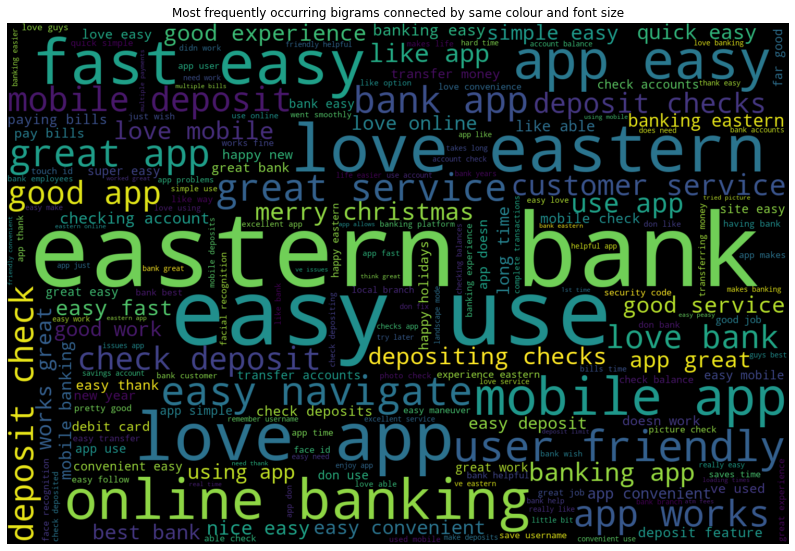

In [66]:
# Generating wordcloud and saving as jpg image
plt.figure(figsize=(14,10))

words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save to file
# wordCloud.to_file('wordcloud_bigram.jpg')

# Topic Plots

In [67]:
# use the TF-IDF vectorizor to give more weight to rare words
# TF-IDF specific setup
from sklearn.feature_extraction.text import TfidfVectorizer 

# Generate the TF-IDF vectors
# this is the same step as earlier with the count vectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=10000)
vectors_tfidf = vectorizer_tfidf.fit_transform(df.Comments)
print(vectors_tfidf.shape)

(1642, 1768)


In [68]:
# get UMAP for dimension reduction
import umap

In [70]:
# Generate the TF-IDF dimension reduction
embedding_tfidf = umap.UMAP(random_state=SEED).fit_transform(vectors_tfidf)

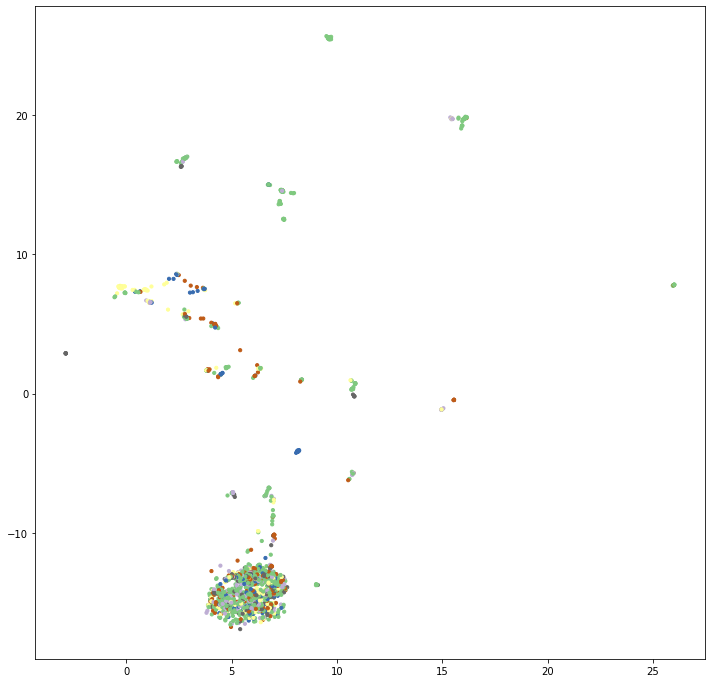

In [73]:
# Visualise TF-IDF embeddings
plt.figure(figsize=(12,12))
plt.scatter(embedding_tfidf[:,0],
            embedding_tfidf[:,1],
            s=10,
            c=df.Topic,
            cmap=plt.cm.Accent)
plt.show()

In [74]:
# improve with plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import textwrap

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [75]:
# set up plotting

df['x'] = embedding_tfidf[:,0]
df['y'] = embedding_tfidf[:,1]

In [78]:
# Wrap the text so it displays nicely in Plotly hover
df['wrap'] = df['Comments'].map(lambda x: '<br>'.join(textwrap.wrap(x, 64)))

In [79]:
enable_plotly_in_cell()
DIMENSION = 'Topic'

layout = go.Layout(
    autosize=False,
    width=600,
    height=600,
    hovermode="closest"
)

data = [go.Scatter(
                x=df.x,
                y=df.y,
                text=df.wrap,
                mode='markers',
                marker=dict(
                        size=6,
                        colorscale='viridis',
                        color=df[DIMENSION],
                        showscale=True
                )
                )]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [80]:
# alternate colorscales
# https://plotly.com/python/builtin-colorscales/

enable_plotly_in_cell()
DIMENSION = 'Topic'

layout = go.Layout(
    autosize=False,
    width=600,
    height=600,
    hovermode="closest"
)

data = [go.Scatter(
                x=df.x,
                y=df.y,
                text=df.wrap,
                mode='markers',
                marker=dict(
                        size=6,
                        colorscale='GnBu',
                        color=df[DIMENSION],
                        showscale=True
                )
                )]

fig = go.Figure(data=data, layout=layout)

iplot(fig)